<a href="https://colab.research.google.com/github/vmcarranzam/econometriaR/blob/main/Lab3_Econometria_en_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [47]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
library(dplyr)
library(ggplot2)
library(caret)
library(corrplot)

corrplot 0.92 loaded



# EJERCICIO 1

Utilizando R realice una función que dado un dataframe cualquiera de dos columnas, donde la primera (índice 1) sea el valor de la variable independiente (X) y la segunda sea el valor de una variable dependiente (Y), devuelva una lista con los siguientes elementos:

1. Un arreglo con los valores de los estimadores para b1 y b0
2. El valor del coeficiente de determinación del modelo.
3. El coeficiente de correlación r (raíz cuadrada del inciso anterior).
4. Un arreglo con los valores de los residuos.
5. Una gráfica con la nube de puntos y la recta de regresión del modelo.

In [35]:
calcular_regresion <- function(data, col_x, col_y) {
  # Extraigo las columnas del dataframe
  x <- data[[col_x]]
  y <- data[[col_y]]

  # 1. Calculo los estimadores de beta1 y beta0
  n <- length(x)
  beta_1 <- (sum(x * y) - n * mean(x) * mean(y)) / (sum(x^2) - n * mean(x)^2)
  beta_0 <- mean(y) - beta_1 * mean(x)
  estimadores <- c(beta_0, beta_1)

  # 2. Calculo el coeficiente de determinación
  y_pred <- beta_0 + beta_1 * x
  ssr <- sum((y_pred - mean(y))^2)
  sse <- sum((y - y_pred)^2)
  sst <- sum((y - mean(y))^2)
  r_cuadrado <- ssr / sst

  # 3. Calculo el coeficiente de correlación
  r <- sqrt(r_cuadrado)

  # 4. Calculo los residuos
  residuos <- y - y_pred

  # 5. Gráficola nube de puntos con la recta de regresión
  df <- data.frame(x = x, y = y, y_pred = y_pred)
  grafica <- ggplot(df, aes(x = x, y = y)) +
    geom_point() +
    geom_line(aes(y = y_pred), color = "red") +
    labs(x = colnames(data)[col_x], y = colnames(data)[col_y])

  # Retorno los resultados en una lista
  resultados <- list(estimadores = estimadores,
                     r_cuadrado = r_cuadrado,
                     r = r,
                     residuos = residuos,
                     grafica = grafica)
  return(resultados)
}

Creo un dataset de prueba

In [9]:
n <- 100
set.seed(33)
X <- runif(n, min = 0, max = 10)
Y <- 2*X + rnorm(n, mean = 0, sd = 1)
df1 <- data.frame(X, Y)


In [36]:
resultados <- calcular_regresion(df1,"X","Y")

$estimadores
[1] -0.1510539  2.0556441

$r_cuadrado
[1] 0.9639163

$r
[1] 0.9817924

$residuos
  [1] -0.636676011 -1.569346821  0.149785502 -0.326019533 -1.313789353
  [6] -0.907121175 -0.670261258 -0.972883892 -2.034575062 -0.428711471
 [11] -0.144320672  0.300599133  0.718018135 -1.651119686 -0.096119761
 [16] -0.240767071 -0.453861826 -1.463786017 -0.293668166  0.101278301
 [21]  1.461854853  2.050572671 -0.283753101 -0.483165114  0.802994127
 [26]  1.381639006  0.952256143 -1.564895269  2.460043707  0.505068426
 [31] -1.615744966  0.631591952 -0.612163620  2.070914082 -1.084120373
 [36] -0.092539487  0.755095360 -1.756504375  0.811203095 -1.316739634
 [41] -0.401902130  1.551297143 -0.794901289 -0.351593802 -2.059245579
 [46]  1.942218892 -0.892685079  0.549871435 -1.329100013 -0.746157398
 [51]  1.013549514 -0.309120546 -0.825708538 -1.724683634  1.971065973
 [56] -2.966194906  0.297919261 -0.704810799  0.534888304 -0.193212920
 [61]  1.631318543 -0.744026060 -0.381418253  0.70506

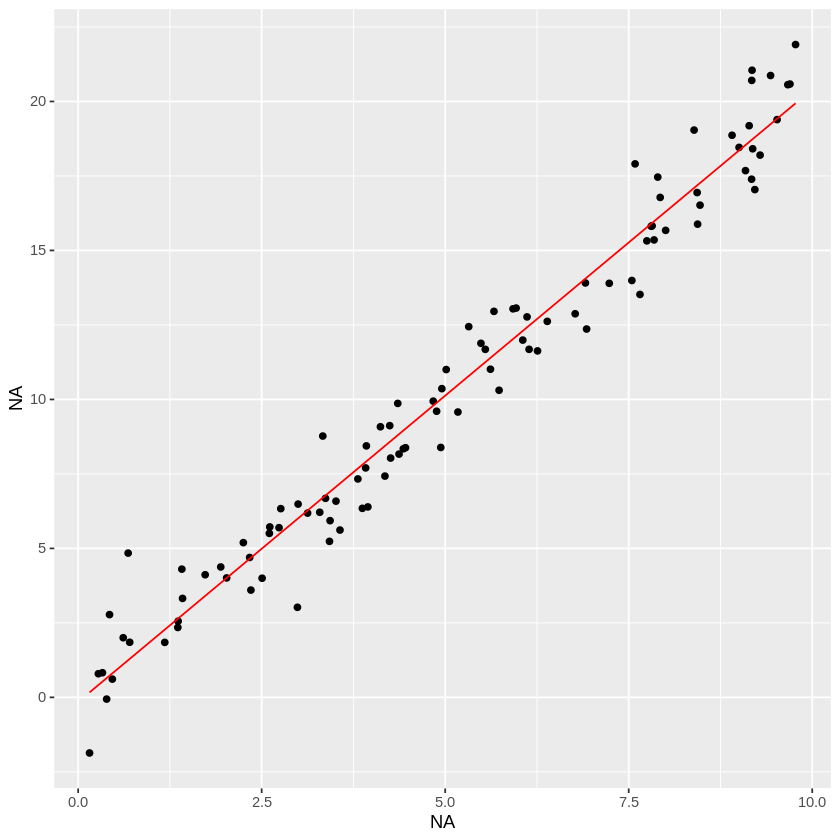

In [37]:
print(resultados)

#EJERCICIO 2

In [42]:
# Cargar el dataset Admissions (asegúrate de tener el archivo CSV en tu directorio de trabajo)
admissions <- read.csv("Admisions.csv")

In [43]:
# 1. Análisis estadístico de todas las variables del dataset
summary(admissions)

   Serial.No.      GRE.Score      TOEFL.Score    University.Rating
 Min.   :  1.0   Min.   :290.0   Min.   : 92.0   Min.   :1.000    
 1st Qu.:125.8   1st Qu.:308.0   1st Qu.:103.0   1st Qu.:2.000    
 Median :250.5   Median :317.0   Median :107.0   Median :3.000    
 Mean   :250.5   Mean   :316.5   Mean   :107.2   Mean   :3.114    
 3rd Qu.:375.2   3rd Qu.:325.0   3rd Qu.:112.0   3rd Qu.:4.000    
 Max.   :500.0   Max.   :340.0   Max.   :120.0   Max.   :5.000    
      SOP             LOR             CGPA          Research   
 Min.   :1.000   Min.   :1.000   Min.   :6.800   Min.   :0.00  
 1st Qu.:2.500   1st Qu.:3.000   1st Qu.:8.127   1st Qu.:0.00  
 Median :3.500   Median :3.500   Median :8.560   Median :1.00  
 Mean   :3.374   Mean   :3.484   Mean   :8.576   Mean   :0.56  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:9.040   3rd Qu.:1.00  
 Max.   :5.000   Max.   :5.000   Max.   :9.920   Max.   :1.00  
 Chance.of.Admit 
 Min.   :0.3400  
 1st Qu.:0.6300  
 Median :0.7200  
 Mean   :0.

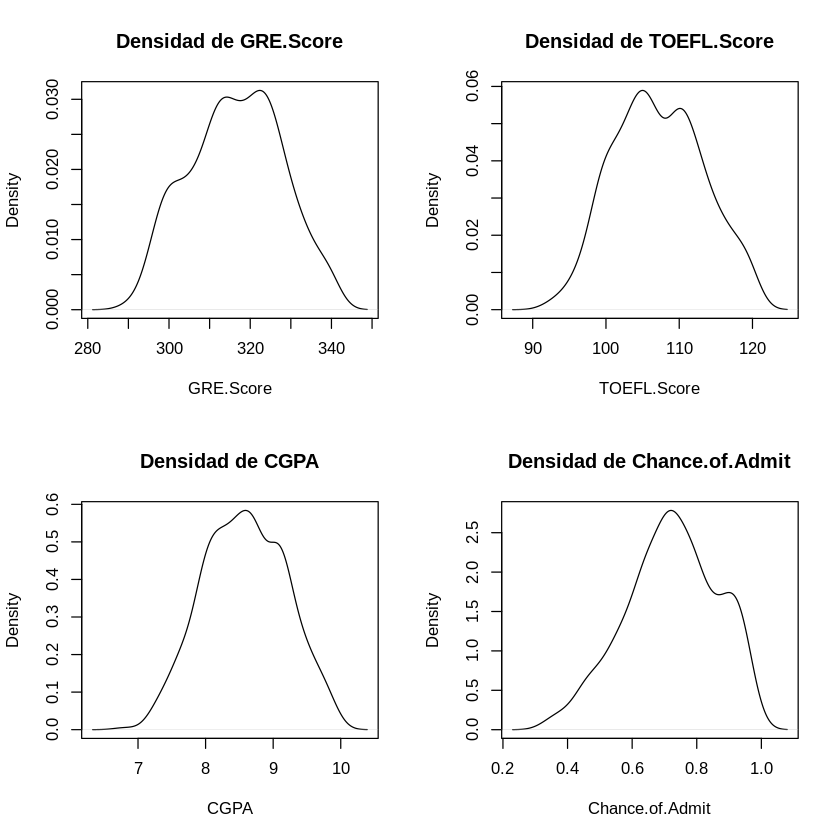

In [44]:
# 2. Gráficas de densidad para las variables numéricas
variables_numericas <- c("GRE.Score", "TOEFL.Score", "CGPA", "Chance.of.Admit")
par(mfrow = c(2, 2)) # Organizar las gráficas en un formato de 2x2

for (variable in variables_numericas) {
  density_plot <- density(admissions[[variable]])
  plot(density_plot, main = paste("Densidad de", variable), xlab = variable)
}

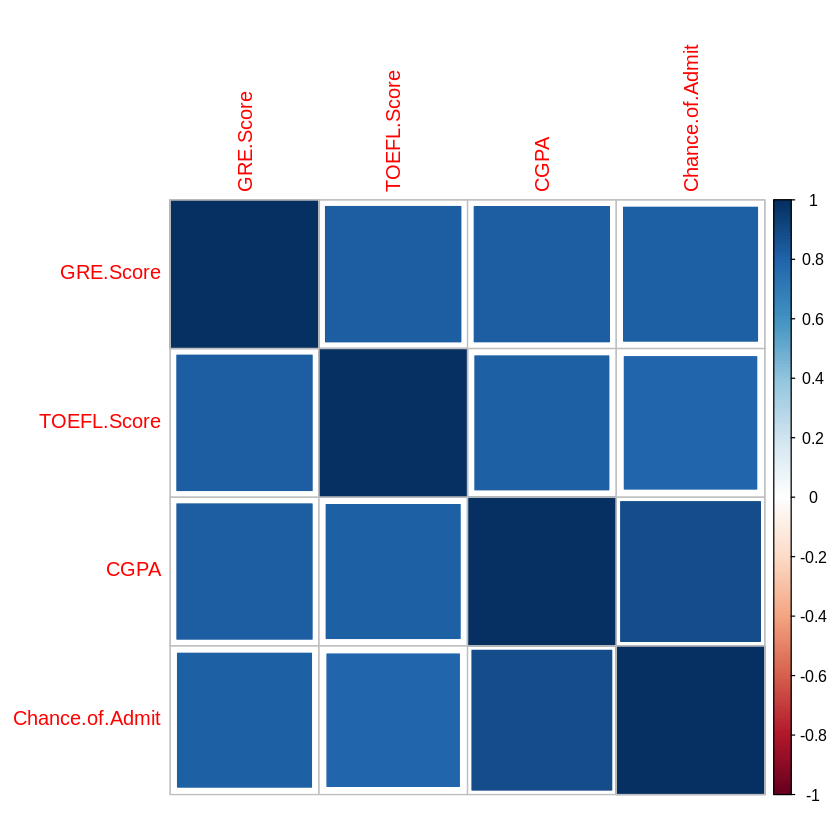

In [50]:
# 3. Gráfica de correlación entre las variables numéricas
correlation_matrix <- cor(admissions[, variables_numericas])
corrplot::corrplot(correlation_matrix, method = "square")

4. Comentarios sobre el análisis estadístico y la gráfica de correlación
 - La oportunidad de admisión parece tener fuerte correlación con el CGPA, tanto en las gráficas de densidad como en el mapa de calor.


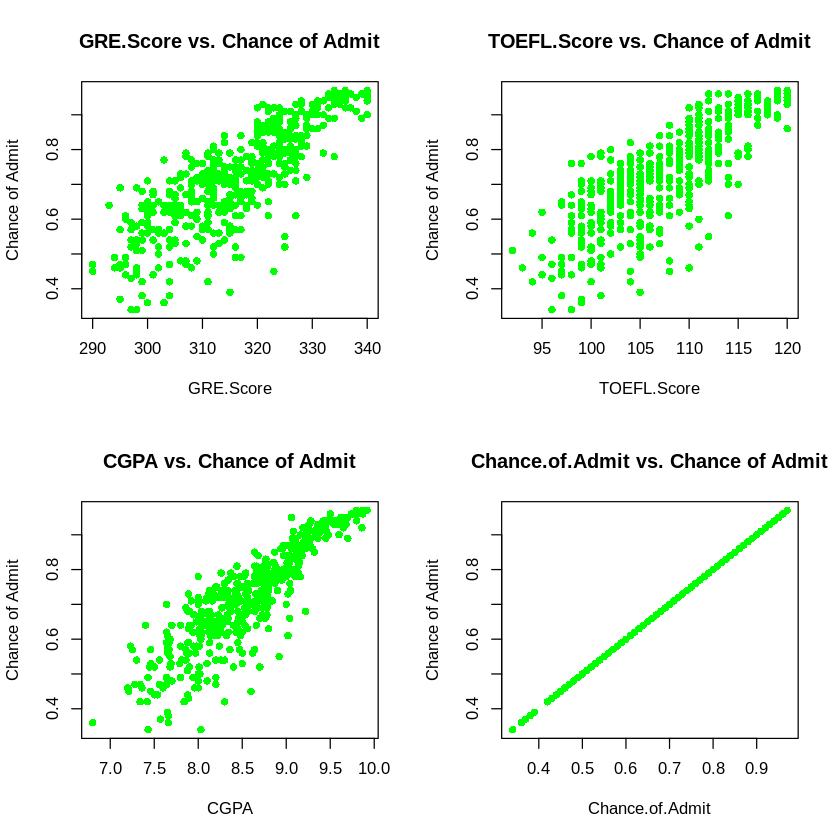

In [52]:
# 5. Scatter plot de todas las variables numéricas contra Chance of Admit
par(mfrow = c(2, 2))

for (variable in variables_numericas) {
  plot(admissions[[variable]], admissions$Chance.of.Admit,
       main = paste(variable, "vs. Chance of Admit"),
       xlab = variable, ylab = "Chance of Admit", col = "green", pch = 16)
}

In [59]:
# 6. Modelos de regresión y cálculo del RMSE utilizando cross-validation
# Defino la fórmula
formula <- "Chance.of.Admit ~ TOEFL.Score + CGPA + GRE.Score"

# Defino una función para calcular RMSE
calculate_rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))
}

# Parametrizo validación cruzada
set.seed(33)
k <- 5
rmse_values <- numeric(7)

# Validación cruzada para cada modelo
for (i in 1:7) {
  folds <- cut(seq(1, nrow(admissions)), breaks = k, labels = FALSE)

  predicted <- numeric(length(admissions$Chance.of.Admit))

  for (j in 1:k) {
    train_set <- admissions[folds != j, ]
    test_set <- admissions[folds == j, ]

    model <- lm(formula, data = train_set)
    predicted[folds == j] <- predict(model, newdata = test_set)
  }

  rmse_values[i] <- calculate_rmse(admissions$Chance.of.Admit, predicted)
}

model_names <- c("modelo1", "modelo2", "modelo3", "modelo4", "modelo5", "modelo6", "modelo7")
resultados <- setNames(rmse_values, model_names)
resultados_ordenados <- sort(resultados, decreasing = FALSE)

print(resultados_ordenados)

modelo1 modelo2 modelo3 modelo4 modelo5 modelo6 modelo7 
0.06412 0.06412 0.06412 0.06412 0.06412 0.06412 0.06412 
